## Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency

## Importing Dataset

In [40]:
main_df = pd.read_csv('raw_data/train.csv')
main_df = main_df.drop(main_df.columns[0], axis=1)

### Data Analysis

In [41]:
main_df.head()

,id,owner_1_score,RATE_owner_1,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,owner_2_score,RATE_owner_2,CAP_AMOUNT_owner_2,PERCENT_OWN_owner_2,owner_3_score,...,INPUT_VALUE_ID_FOR_avg_net_deposits,RATE_ID_FOR_avg_net_deposits,INPUT_VALUE_ID_FOR_industry_type,RATE_ID_FOR_industry_type,INPUT_VALUE_owner_4,RATE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id,completion_status
0,4813,606.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,606.0,A,150000.0,100.0,4642,Paid off with renewal
1,1406,703.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,NaN,...,107027.25,NaN,preferred,NaN,703.0,A,150000.0,100.0,1362,Paid in full
2,7415,692.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,692.0,A,150000.0,100.0,6485,Default
3,6759,684.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,684.0,A,150000.0,100.0,6035,Paid via discounted payoff
4,5867,625.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,625.0,A,150000.0,100.0,5299,Paid in full


In [30]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   id                                        1537 non-null   int64  
 1   owner_1_score                             1516 non-null   float64
 2   RATE_owner_1                              1510 non-null   object 
 3   CAP_AMOUNT_owner_1                        1506 non-null   float64
 4   PERCENT_OWN_owner_1                       1524 non-null   float64
 5   owner_2_score                             185 non-null    float64
 6   RATE_owner_2                              185 non-null    object 
 7   CAP_AMOUNT_owner_2                        174 non-null    float64
 8   PERCENT_OWN_owner_2                       224 non-null    float64
 9   owner_3_score                             7 non-null      float64
 10  RATE_owner_3                        

In [15]:
main_df.describe()

,id,owner_1_score,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,owner_2_score,CAP_AMOUNT_owner_2,PERCENT_OWN_owner_2,owner_3_score,CAP_AMOUNT_owner_3,PERCENT_OWN_owner_3,...,INPUT_VALUE_ID_FOR_tax_lien_percent,INPUT_VALUE_ID_FOR_tax_lien_count,INPUT_VALUE_ID_FOR_current_position,INPUT_VALUE_ID_FOR_avg_net_deposits,RATE_ID_FOR_avg_net_deposits,RATE_ID_FOR_industry_type,INPUT_VALUE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id
count,1537.000000,1516.000000,1506.000000,1524.000000,185.000000,174.000000,224.000000,7.000000,7.000000,33.000000,...,1537.000000,1528.000000,1525.000000,1.531000e+03,0.0,0.0,1510.000000,1457.000000,1491.000000,1537.000000
mean,4497.816526,639.666227,117031.872510,92.826509,1118.902703,117011.494253,35.324107,623.857143,85714.285714,7.572727,...,0.047681,0.014398,0.714754,9.107680e+04,NaN,NaN,656.448344,116420.727522,97.400469,3943.005205
std,2553.947155,436.564984,47147.062423,39.239430,1988.694684,53867.530571,18.474337,224.808384,80178.372574,16.709134,...,1.388539,0.176711,0.779881,1.732702e+05,NaN,NaN,570.443661,47681.543573,37.275931,2172.407533
min,33.000000,0.000000,0.000000,0.000000,432.000000,0.000000,0.000000,376.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,0.000000,0.000000,0.000000,88.000000
25%,2609.000000,573.000000,100000.000000,100.000000,582.000000,100000.000000,20.000000,387.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,568.000000,100000.000000,100.000000,2234.000000
50%,4468.000000,620.000000,150000.000000,100.000000,647.000000,150000.000000,49.000000,804.000000,150000.000000,0.000000,...,0.000000,0.000000,1.000000,4.735876e+04,NaN,NaN,621.000000,150000.000000,100.000000,4171.000000
75%,6324.000000,664.000000,150000.000000,100.000000,680.000000,150000.000000,50.000000,804.000000,150000.000000,0.000000,...,0.000000,0.000000,1.000000,1.051457e+05,NaN,NaN,665.000000,150000.000000,100.000000,5428.000000
max,11271.000000,9002.000000,150000.000000,1000.000000,9002.000000,150000.000000,64.000000,804.000000,150000.000000,50.000000,...,53.968000,3.000000,4.000000,2.291481e+06,NaN,NaN,9002.000000,150000.000000,1000.000000,9062.000000


In [48]:
for column in main_df.columns:
    nan_count = main_df[column].isna().sum()
    print(f"{column}: {nan_count}")

id: 0
owner_1_score: 21
RATE_owner_1: 27
CAP_AMOUNT_owner_1: 31
PERCENT_OWN_owner_1: 13
owner_2_score: 1352
RATE_owner_2: 1352
CAP_AMOUNT_owner_2: 1363
PERCENT_OWN_owner_2: 1313
owner_3_score: 1530
RATE_owner_3: 1530
CAP_AMOUNT_owner_3: 1530
PERCENT_OWN_owner_3: 1504
years_in_business: 12
RATE_ID_FOR_years_in_business: 12
fsr: 417
RATE_ID_FOR_fsr: 1522
location: 10
RATE_ID_FOR_location: 64
funded_last_30: 0
RATE_ID_FOR_funded_last_30: 1532
judgement_lien_percent: 0
RATE_ID_FOR_judgement_lien_percent: 0
INPUT_VALUE_ID_FOR_judgement_lien_amount: 0
RATE_ID_FOR_judgement_lien_amount: 0
INPUT_VALUE_ID_FOR_judgement_lien_time: 1537
RATE_ID_FOR_judgement_lien_time: 1537
INPUT_VALUE_ID_FOR_num_negative_days: 0
RATE_ID_FOR_num_negative_days: 2
INPUT_VALUE_ID_FOR_num_deposits: 0
RATE_ID_FOR_num_deposits: 0
INPUT_VALUE_ID_FOR_monthly_gross: 0
RATE_ID_FOR_monthly_gross: 0
INPUT_VALUE_ID_FOR_average_ledger: 0
RATE_ID_FOR_average_ledger: 0
INPUT_VALUE_ID_FOR_fc_margin: 0
RATE_ID_FOR_fc_margin: 0
INP

In [17]:
print('NA values:',main_df.isnull().values.any())

NA values: True


In [20]:
print(f"The shape of the Data Frame is: {main_df.shape}")

The shape of the Data Frame is: (1537, 55)


In [19]:
print(f"Number of Duplicates: {main_df.duplicated().sum()}")

Number of Duplicates: 421


In [22]:
unique_values = main_df['completion_status'].unique()

print(unique_values)

['Paid off with renewal' 'Paid in full' 'Default'
 'Paid via discounted payoff']


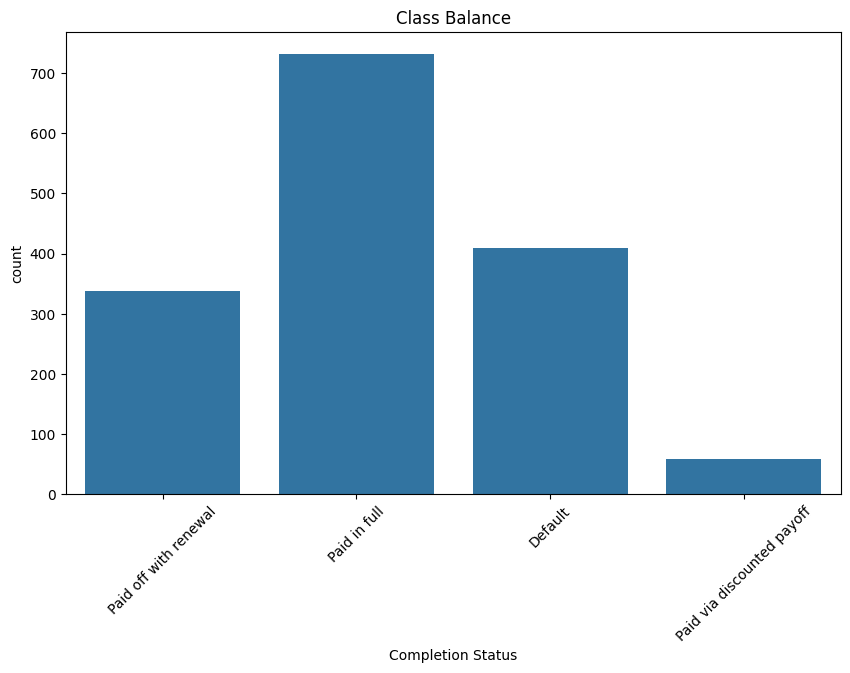

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x=main_df['completion_status'])
plt.title('Class Balance')
plt.xlabel('Completion Status')
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

### Path 1 - Imputing Missing Values

### Path 2 - Dropping Missing Values

Feature Importance

In [51]:
target = main_df['completion_status']
features = main_df.drop(['completion_status', 'id'], axis=1)

features = pd.get_dummies(features)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(features, target)

feature_importances = clf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_n = 25
print(feature_importance_df.head(top_n))

                                 Feature  Importance
30            deal_application_thread_id    0.113976
9                      years_in_business    0.106447
0                          owner_1_score    0.091532
27                   INPUT_VALUE_owner_4    0.084126
10                                   fsr    0.081436
24   INPUT_VALUE_ID_FOR_avg_net_deposits    0.049685
17      INPUT_VALUE_ID_FOR_monthly_gross    0.048122
16       INPUT_VALUE_ID_FOR_num_deposits    0.045299
18     INPUT_VALUE_ID_FOR_average_ledger    0.044721
19          INPUT_VALUE_ID_FOR_fc_margin    0.037743
15  INPUT_VALUE_ID_FOR_num_negative_days    0.029641
2                    PERCENT_OWN_owner_1    0.015007
23   INPUT_VALUE_ID_FOR_current_position    0.013927
1                     CAP_AMOUNT_owner_1    0.012552
28                    CAP_AMOUNT_owner_4    0.012526
3                          owner_2_score    0.010034
5                    PERCENT_OWN_owner_2    0.010025
50                         location_Home    0.